RANDOMxFOREST=**IRISxCAR_EVALUATION!**

In [1]:
# 1. IMPORT ALL PACKAGES ENSEMBLE LEARNING = RANDOM FOREST
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# 2. IMPORT DATASET (Car Evaluation Dataset)
# Make sure "car_evaluation.csv" is in your working directory.
df = pd.read_csv("/content/iris (3).csv")

In [3]:
# 3. DISPLAY HEAD, TAIL, DESCRIBE, COLUMN NAMES, DATA SIZE & SHAPE
print("First 5 rows:")
print(df.head())

print("\nLast 5 rows:")
print(df.tail())

print("\nStatistical Description:")
print(df.describe())

print("\nColumn Names:")
print(df.columns.tolist())

print("\nData Shape (rows, columns):")
print(df.shape)

print("\nData Size (total elements):")
print(df.size)

First 5 rows:
   sepal_length  sepal_width  petal_length  petal_width  target
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0

Last 5 rows:
     sepal_length  sepal_width  petal_length  petal_width  target
145           6.7          3.0           5.2          2.3       2
146           6.3          2.5           5.0          1.9       2
147           6.5          3.0           5.2          2.0       2
148           6.2          3.4           5.4          2.3       2
149           5.9          3.0           5.1          1.8       2

Statistical Description:
       sepal_length  sepal_width  petal_length  petal_width      target
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333   

In [6]:
# 4. CHECK FOR NULL VALUES & REMOVE IF ANY, THEN CHECK & REMOVE DUPLICATES
print("\nChecking for Null Values:")
print(df.isnull().sum())

# If any null values exist, remove them (if needed uncomment the following line)
# df.dropna(inplace=True)

# Check for duplicates
print("\nNumber of Duplicates:", df.duplicated().sum())
# Remove duplicates if found
df.drop_duplicates(inplace=True)

print("\nData Shape after cleaning (rows, columns):", df.shape)

# 5. DISPLAY FEW STATISTICAL DATA (e.g., frequency counts of 'outcome')
print("\nFrequency count for 'outcome':")
print(df['target'].value_counts())

# 6. LABEL ENCODER FOR DATASET TO CONVERT CATEGORICAL VALUES TO NUMBERS
#encoder = LabelEncoder()
## Applying encoding to each categorical column in features
#df['buying'] = encoder.fit_transform(df['buying'])
#df['maint'] = encoder.fit_transform(df['maint'])
#df['doors'] = encoder.fit_transform(df['doors'])
#df['persons'] = encoder.fit_transform(df['persons'])
#df['lug_boot'] = encoder.fit_transform(df['lug_boot'])
#df['safety'] = encoder.fit_transform(df['safety'])
# Optionally, you may also encode the target variable if required
#df['outcome'] = encoder.fit_transform(df['outcome'])

print("\nDataset after Label Encoding:")
print(df.head())



Checking for Null Values:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

Number of Duplicates: 0

Data Shape after cleaning (rows, columns): (147, 5)

Frequency count for 'outcome':
target
1    50
2    49
0    48
Name: count, dtype: int64

Dataset after Label Encoding:
   sepal_length  sepal_width  petal_length  petal_width  target
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0


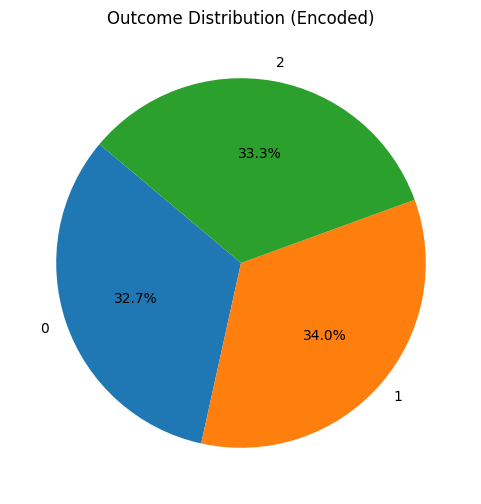

In [8]:
# 7. EDA: Visualize the distribution of 'outcome' using a Pie Chart
#    using Counter from collections
outcome_counts = Counter(df['target'])
labels = list(outcome_counts.keys())
sizes = list(outcome_counts.values())

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Outcome Distribution (Encoded)")
plt.show()

# 8. DATA PREPROCESSING: SPLITTING THE DATA INTO FEATURES AND TARGET
X = df.drop('target', axis=1)  # All features
y = df['target']               # Target variable

# Split data into training and testing sets (default split, adjust test_size if needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
# 9. TRAIN THE MODEL & TEST ACCURACY
# Create a RandomForestClassifier with specified hyperparameters
model = RandomForestClassifier(n_estimators=25, max_depth=15, bootstrap=False, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=15, n_estimators=25,
                       random_state=42)

In [10]:
# Predict on test data
predict = model.predict(X_test)
print("\nPredictions on Test Data:")
print(predict)

# 10. METRICS: CALCULATE ACCURACY, CLASSIFICATION REPORT & CONFUSION MATRIX
acc = accuracy_score(y_test, predict)
print("\nAccuracy Score:", acc)

print("\nClassification Report:")
print(classification_report(y_test, predict))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predict))


Predictions on Test Data:
[2 1 2 0 1 0 1 0 2 0 0 1 2 1 2 1 0 1 2 0 0 2 0 2 1 0 1 2 1 0 2 0 2 0 0 2 2]

Accuracy Score: 0.9459459459459459

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.90      0.90      0.90        10
           2       0.92      0.92      0.92        13

    accuracy                           0.95        37
   macro avg       0.94      0.94      0.94        37
weighted avg       0.95      0.95      0.95        37


Confusion Matrix:
[[14  0  0]
 [ 0  9  1]
 [ 0  1 12]]


In [12]:
# Splitting features and target for the Car Evaluation dataset.
X_car = df.drop('target', axis=1)
y_car = df['target']

# Initialize the RandomForestClassifier for the Car Evaluation dataset.
model_car = RandomForestClassifier()

# Define a dictionary of hyperparameters to search.
parameters_car = {
    'max_depth': [5, 10, 15, 20, 25],
    'random_state': [0, 1, 2],
    'n_estimators': [10, 30, 50, 70, 100]
}

# Using GridSearchCV for hyperparameter tuning on the Car Evaluation dataset.
grid_car = GridSearchCV(model_car, parameters_car, cv=5, verbose=1)
grid_car.fit(X_car, y_car)

print("\n[Car Evaluation] Best Score from GridSearchCV:")
print(grid_car.best_score_)

print("\n[Car Evaluation] Best Hyperparameters from GridSearchCV:")
print(grid_car.best_params_)

# You can further refine the tuning process for the Car Evaluation dataset just as we did with the Breast Cancer dataset.
# For example, a second round of tuning with a narrower range:
parameters_car = {
    'max_depth': [10, 11, 12],
    'random_state': [2],
    'n_estimators': [65, 70, 75]
}
grid_car = GridSearchCV(model_car, parameters_car, cv=5, verbose=1)
grid_car.fit(X_car, y_car)
print("\n[Car Evaluation - Second Round] Best Score:", grid_car.best_score_)
print("[Car Evaluation - Second Round] Best Parameters:", grid_car.best_params_)

Fitting 5 folds for each of 75 candidates, totalling 375 fits

[Car Evaluation] Best Score from GridSearchCV:
0.9521839080459771

[Car Evaluation] Best Hyperparameters from GridSearchCV:
{'max_depth': 5, 'n_estimators': 30, 'random_state': 1}
Fitting 5 folds for each of 9 candidates, totalling 45 fits

[Car Evaluation - Second Round] Best Score: 0.9521839080459771
[Car Evaluation - Second Round] Best Parameters: {'max_depth': 10, 'n_estimators': 75, 'random_state': 2}


In [13]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Load the Iris dataset
iris = load_iris()
X_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
y_iris = iris.target

# Initialize the RandomForestClassifier for the Iris dataset.
model_iris = RandomForestClassifier()

# Define a dictionary of hyperparameters to search.
parameters_iris = {
    'max_depth': [5, 10, 15, 20, 25],
    'random_state': [0, 1, 2],
    'n_estimators': [10, 30, 50, 70, 100]
}

# Using GridSearchCV for hyperparameter tuning on the Iris dataset.
grid_iris = GridSearchCV(model_iris, parameters_iris, cv=5, verbose=1)
grid_iris.fit(X_iris, y_iris)

print("\n[Iris Dataset] Best Score from GridSearchCV:")
print(grid_iris.best_score_)

print("\n[Iris Dataset] Best Hyperparameters from GridSearchCV:")
print(grid_iris.best_params_)

# A second round of tuning with a narrower range based on the first round's output:
parameters_iris = {
    'max_depth': [10, 11, 12],
    'random_state': [2],
    'n_estimators': [65, 70, 75]
}
grid_iris = GridSearchCV(model_iris, parameters_iris, cv=5, verbose=1)
grid_iris.fit(X_iris, y_iris)

print("\n[Iris Dataset - Second Round] Best Score:")
print(grid_iris.best_score_)

print("[Iris Dataset - Second Round] Best Parameters:")
print(grid_iris.best_params_)


Fitting 5 folds for each of 75 candidates, totalling 375 fits

[Iris Dataset] Best Score from GridSearchCV:
0.9666666666666668

[Iris Dataset] Best Hyperparameters from GridSearchCV:
{'max_depth': 5, 'n_estimators': 10, 'random_state': 1}
Fitting 5 folds for each of 9 candidates, totalling 45 fits

[Iris Dataset - Second Round] Best Score:
0.9533333333333334
[Iris Dataset - Second Round] Best Parameters:
{'max_depth': 10, 'n_estimators': 65, 'random_state': 2}


DECISIONxTREE-IRIS

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
data=pd.read_csv('/content/iris (3).csv')
data.shape

(150, 5)

In [18]:
data.head()
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [19]:
data.isnull().sum().sum()
print(data.duplicated().sum())
data.drop_duplicates(inplace=True)
data.shape

3


(147, 5)

In [20]:
data.target.unique()

array([0, 1, 2])

In [21]:
X=data.iloc[:,[0,1,2,3]]
y=data[['target']]

In [22]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 10)

In [24]:
X_train.shape

(110, 4)

In [25]:
y_train.shape

(110, 1)

In [26]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.9459459459459459

In [28]:
model.get_depth()

4

In [29]:
model = DecisionTreeClassifier(max_depth=3) # max.depth
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.9459459459459459

In [30]:
model = DecisionTreeClassifier(max_depth=10) # max.depth
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.9459459459459459

In [31]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.88      1.00      0.93        14
           2       1.00      0.83      0.91        12

    accuracy                           0.95        37
   macro avg       0.96      0.94      0.95        37
weighted avg       0.95      0.95      0.95        37



In [32]:
confusion_matrix(y_test,y_predict)

array([[11,  0,  0],
       [ 0, 14,  0],
       [ 0,  2, 10]])

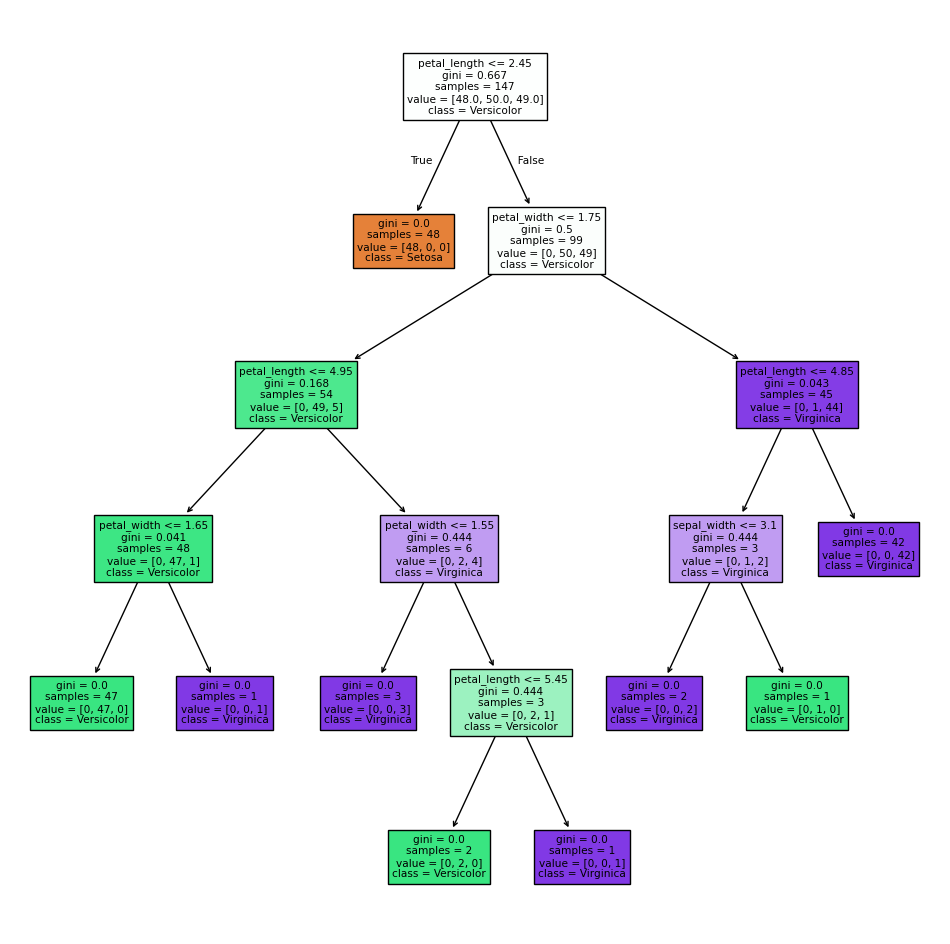

In [33]:
from sklearn import tree
from matplotlib import rcParams
rcParams['figure.figsize']=12,12
dt = tree.DecisionTreeClassifier()
dt.fit(X,y)
tree.plot_tree(dt,
               class_names=['Setosa','Versicolor','Virginica'],
               feature_names=['sepal_length','sepal_width','petal_length','petal_width'],
              filled=True,max_depth=6)
plt.show()

In [34]:
from collections import Counter
Counter(data.target)

Counter({0: 48, 1: 50, 2: 49})

In [35]:
data.target.value_counts()

,count
target,
1,50
2,49
0,48


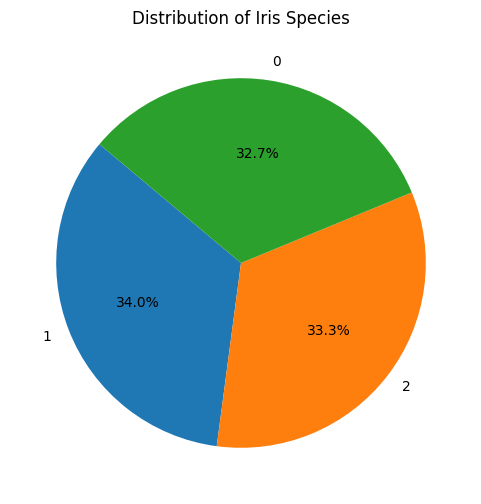

In [36]:
# Pie Chart for target distribution
target_counts = data['target'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Iris Species')
plt.show()
